# Applied Machine Learning - Linear | Logisitc | SVM
### Blake Hartung

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

**Linear Regression**

Synthetic Linear Regression

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

Plot z vs x and z vs y in the synthetic dataset as scatter plots.

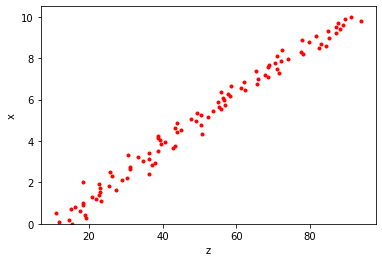

In [5]:
### Plotting z vs x
plt.scatter(z, x, c='r', marker='.')
plt.ylim(bottom=0)
plt.xlabel('z')
plt.ylabel('x')
plt.show()

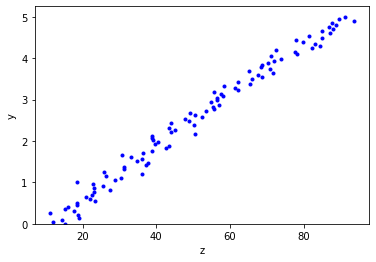

In [6]:
### Plotting z vs y
plt.scatter(z, y, c='b', marker='.')
plt.ylim(bottom=0)
plt.xlabel('z')
plt.ylabel('y')
plt.show()

The features do appear to have a linear relationship, made obvious by linearly increasing axes and a relatively straight line seen.

**Pearson Correlation on Synthetic Dataset**

In [7]:
### Your code here
corr_coef = np.corrcoef(x, y)
corr_coef

array([[1., 1.],
       [1., 1.]])

The two dependent variables are perfectly corellated. They are both created using a numpy linspace and are thus noiseless linear arrays starting from 0 and stepping upward at a rate defined inherently by linspace. Linear regression cannot be applied on correlated features as it will create a large variance in the weight vector result due to multicollinearity.

**Auto MPG Dataset**

In [8]:
auto_mpg_df = pd.read_csv('Auto_mpg_data.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [9]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**Missing Value analysis**

In [10]:
### Your code here
auto_mpg_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [11]:
auto_mpg_df.isna().any(axis=1).sum()

221

We clearly see some missing data in the columns mileage, engine, max_power, and seats. Here, with a training set of over 8100 rows, I decide to drop rows with missing columns, which turns out to be only 221 rows, as seen above.

In [12]:
auto_mpg_df = auto_mpg_df.dropna()
auto_mpg_df.isna().any(axis=1).sum()

0

**Remove units from data**

In [13]:
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.rstrip(' kmpl').str.rstrip(' km/kg').astype('float')

In [14]:
auto_mpg_df['engine'] = auto_mpg_df['engine'].str.rstrip(' CC').astype('float')

In [15]:
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].str.rstrip(' bhp').apply(lambda x: np.nan if x in [''] else float(x))

In [16]:
auto_mpg_df = auto_mpg_df.dropna()

In [17]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']
auto_mpg_X

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


**distribution of the label (selling_price)**

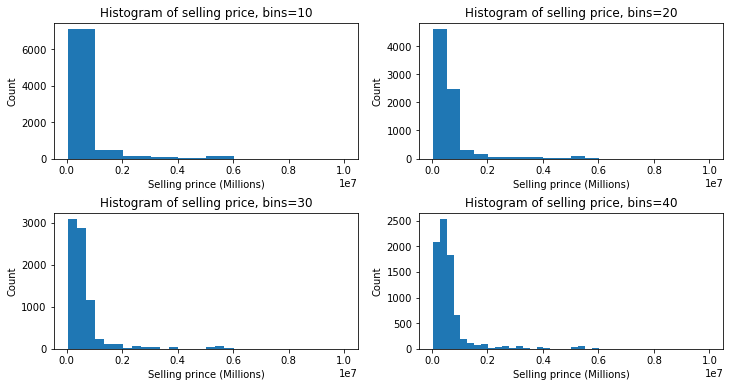

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12,6), gridspec_kw={'hspace': 0.4})
axs[0,0].hist(auto_mpg_y, bins=10)
axs[0,0].set_title('Histogram of selling price, bins=10')
axs[0,0].set_xlabel('Selling prince (Millions)')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(auto_mpg_y, bins=20)
axs[0,1].set_title('Histogram of selling price, bins=20')
axs[0,1].set_xlabel('Selling prince (Millions)')
axs[0,1].set_ylabel('Count')

axs[1,0].hist(auto_mpg_y, bins=30)
axs[1,0].set_title('Histogram of selling price, bins=30')
axs[1,0].set_xlabel('Selling prince (Millions)')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(auto_mpg_y, bins=40)
axs[1,1].set_title('Histogram of selling price, bins=40')
axs[1,1].set_xlabel('Selling prince (Millions)')
axs[1,1].set_ylabel('Count')


plt.show()



**(Selling Price) and the continuous features (Mileage, km driven, engine, max power)**

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


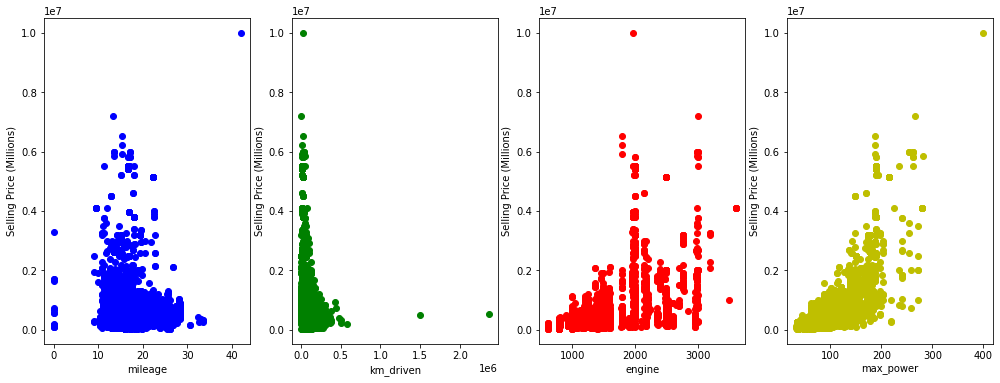

In [19]:
### Your code here
y_label = 'Selling Price (Millions)'
x_labels = ['mileage', 'km_driven', 'engine', 'max_power']
colors = ['b', 'g', 'r', 'y']

fig, ax = plt.subplots(1, 4, squeeze=True, figsize=(17,6), gridspec_kw={'hspace': 0.4})
print(ax)
for i in range(4):
    ax[i].scatter(auto_mpg_X[x_labels[i]], auto_mpg_y, c=colors[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_ylabel(y_label)

plt.show()

(Selling Price) and (fuel type, Seller type, transmission) using a small multiple of box plots.

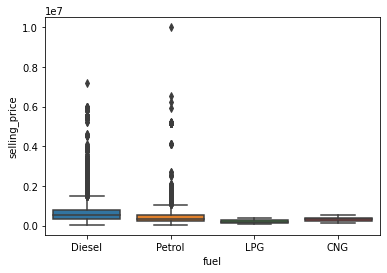

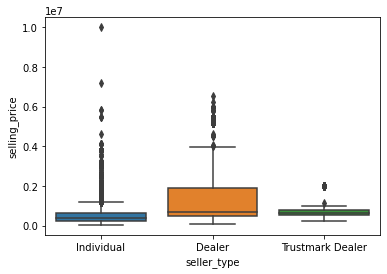

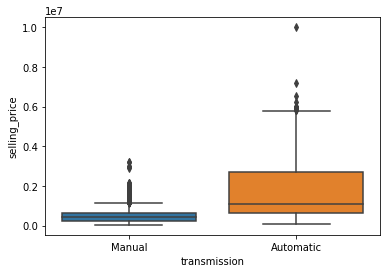

In [20]:
x_labels = ['fuel', 'seller_type', 'transmission']

sns.boxplot(x=x_labels[0], y='selling_price', data=auto_mpg_df)
plt.show()
sns.boxplot(x=x_labels[1], y='selling_price', data=auto_mpg_df)
plt.show()
sns.boxplot(x=x_labels[2], y='selling_price', data=auto_mpg_df)
plt.show()

Why LinReg?

I do believe that this data would be good for a linear regression. Some features, like mileage, don't seem to be correlated to our target very well while others, like being sold from a dealer or max power look pretty strongly correlated. I do worry about multicollinearity between mnax power and engine size, however.

In [21]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [22]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Data Pre-processing**

1. Encode categorial features
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test (zero mean and unit variance).
4. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test as a bias.


In [23]:
# 1. No categorical features in the synthetic dataset (skip this step)
# dropping owner and seats as it was not asked for in features, then one hot encoding other
auto_mpg_X.drop(['owner'], axis=1, inplace=True)
auto_mpg_X.drop(['seats'], axis=1, inplace=True)

In [24]:
for cat_label in x_labels:
    dummies = pd.get_dummies(auto_mpg_X[cat_label], prefix=cat_label)
    auto_mpg_X.drop([cat_label], axis=1, inplace=True)
    auto_mpg_X = auto_mpg_X.merge(dummies, left_index=True, right_index=True)
auto_mpg_X.head()

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,6,145500,23.40,1248.0,74.00,0,1,0,0,0,1,0,0,1
1,6,120000,21.14,1498.0,103.52,0,1,0,0,0,1,0,0,1
2,14,140000,17.70,1497.0,78.00,0,0,0,1,0,1,0,0,1
3,10,127000,23.00,1396.0,90.00,0,1,0,0,0,1,0,0,1
4,13,120000,16.10,1298.0,88.20,0,0,0,1,0,1,0,0,1


In [25]:
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_train, auto_mpg_X_40, auto_mpg_y_train, auto_mpg_y_40 = train_test_split(auto_mpg_X, auto_mpg_y,
                                                                                    train_size=0.6, random_state=23)
auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_val, auto_mpg_y_test = train_test_split(auto_mpg_X_40, auto_mpg_y_40,
                                                                                    train_size=0.6, random_state=23)

In [26]:
# 3. Standardize the columns in the feature matrices
num_features = ['mileage', 'km_driven', 'engine', 'max_power']
for feature in num_features:
    # find column features
    train_mean = auto_mpg_X_train[feature].mean()
    train_std = auto_mpg_X_train[feature].std()
    # alter columns
    auto_mpg_X_train[feature] = auto_mpg_X_train[feature].apply(lambda x: (x - train_mean) / train_std)
    auto_mpg_X_val[feature] = auto_mpg_X_val[feature].apply(lambda x: (x - train_mean) / train_std)
    auto_mpg_X_test[feature] = auto_mpg_X_test[feature].apply(lambda x: (x - train_mean) / train_std)
    
# 4. Add a column of ones to the feature matrices
auto_mpg_X_train['bias_feature'] = 1
auto_mpg_X_val['bias_feature'] = 1
auto_mpg_X_test['bias_feature'] = 1

In [27]:
auto_mpg_X_val.mean()

year                            6.036900
km_driven                       0.024519
mileage                        -0.014475
engine                          0.002366
max_power                       0.021040
fuel_CNG                        0.007380
fuel_Diesel                     0.554033
fuel_LPG                        0.004217
fuel_Petrol                     0.434370
seller_type_Dealer              0.139167
seller_type_Individual          0.837638
seller_type_Trustmark Dealer    0.023195
transmission_Automatic          0.121244
transmission_Manual             0.878756
bias_feature                    1.000000
dtype: float64

**At the end of this pre-processing, we have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**Implement `LinearRegression` class with two methods: `train` and `predict`.**

In [28]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        identity = np.identity(len(X.columns))
        coef_matrix = (X.T @ X) + (self.alpha * identity)
        ordinate = X.T @ y
        self.closed_soln = np.linalg.solve(coef_matrix, ordinate)
        
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        preds = X @ self.closed_soln
        return preds

**Train, Evaluate, and Interpret Linear Regression Model**

In [29]:
def mse(x, y):
    return np.sum((x-y)**2) / len(y)

In [30]:
linreg = LinearRegression()
linreg.train(auto_mpg_X_train, auto_mpg_y_train)
train_preds = linreg.predict(auto_mpg_X_train)
print("Training results")
print("MSE:", mse(train_preds, auto_mpg_y_train))
print("First 5 Results")
print(pd.DataFrame({"preds": train_preds[:5].astype('int'), "actual": auto_mpg_y_train[:5]}))
print()
val_preds = linreg.predict(auto_mpg_X_val)
print("Validation results")
print("MSE:", mse(val_preds, auto_mpg_y_val))
print("First 5 Results")
print(pd.DataFrame({"preds": val_preds[:5].astype('int'), "actual": auto_mpg_y_val[:5]}))
print()
test_preds = linreg.predict(auto_mpg_X_test)
print("Test results")
print("MSE:", mse(test_preds, auto_mpg_y_test))
print("First 5 Results")
print(pd.DataFrame({"preds": test_preds[:5].astype('int'), "actual": auto_mpg_y_test[:5]}))

Training results
MSE: 213249537675.52966
First 5 Results
        preds   actual
1714  1923449  2000000
6318   422326   180000
5082   525998   120000
2339   248351   215000
469    368149   600000

Validation results
MSE: 230945557161.5053
First 5 Results
        preds  actual
2153   416780  250000
2019  1014563  550000
1618   462850  385000
6976  1471581  645000
7445   174647  254999

Test results
MSE: 190396737887.34253
First 5 Results
       preds  actual
7105  108498  170000
3047  319826  450000
7636  172798  250000
5653  437302  350000
5931  564327  500000


**As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances.**

In [31]:
train_mean = auto_mpg_y_train.mean()
print('Base Train MSE (TOP) vs linereg MSE')
print(mse(train_mean, auto_mpg_y_train))
print(212781705266.9667)
print()
print('Base Val MSE (TOP) vs linereg MSE')
print(mse(train_mean, auto_mpg_y_val))
print(232706214669.2992)
print()
print('Base Test MSE (TOP) vs linereg MSE')
print(mse(train_mean, auto_mpg_y_test))
print(181735097199.24805)

Base Train MSE (TOP) vs linereg MSE
689813518223.1897
212781705266.9667

Base Val MSE (TOP) vs linereg MSE
683923579781.1
232706214669.2992

Base Test MSE (TOP) vs linereg MSE
524381484575.09045
181735097199.24805


**Model Interpretation**

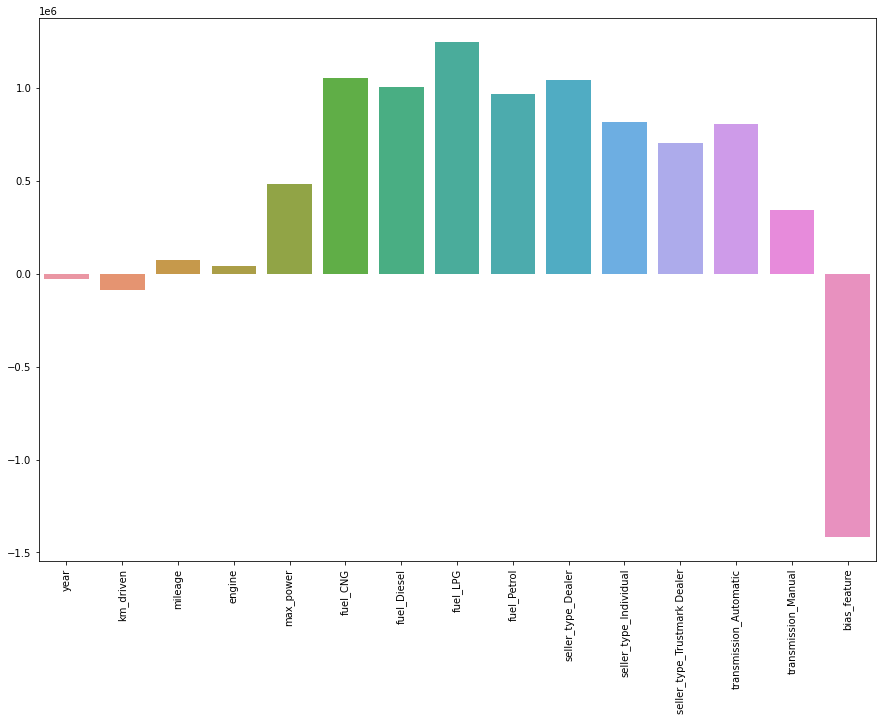

In [32]:
fig = plt.figure(figsize=(15,10))
colnames = list(auto_mpg_X_train.columns)
weights = list(linreg.closed_soln)
ax = sns.barplot(x=colnames, y=weights)
ax.tick_params(axis='x', rotation=90)

The categorical features have an unnecessarily high weight here, as well as the bias feature. It seems like something is off, I definitely need an alpha change to try to alleviate this.

**Tune Regularization Parameter $\alpha$**

RedgeReg Tuning

Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`, performing simple grid search.

In [33]:
alphas = np.logspace(-2, 1, 10)
train_mses = list()
val_mses = list()
for a in alphas:
    linreg_a = LinearRegression(alpha=a)
    linreg_a.train(auto_mpg_X_train, auto_mpg_y_train)
    print('Trained')
    train_preds = linreg_a.predict(auto_mpg_X_train)
    train_mse = mse(train_preds, auto_mpg_y_train)
    train_mses.append(train_mse)
    val_preds = linreg_a.predict(auto_mpg_X_val)
    val_mse = mse(val_preds, auto_mpg_y_val)
    val_mses.append(val_mse)

Trained
Trained
Trained
Trained
Trained
Trained
Trained
Trained
Trained
Trained


In [34]:
np.array(val_mses) ** (1/2)

array([480568.52803029, 480569.1924564 , 480570.62480434, 480573.71478569,
       480580.3906174 , 480594.85723779, 480626.38914159, 480695.79024938,
       480850.36528818, 481195.91165522])

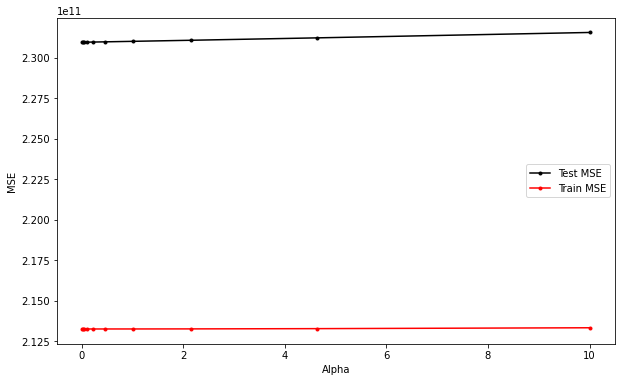

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, val_mses, 'k.-', label="Test MSE")
plt.plot(alphas, train_mses, 'r.-', label="Train MSE")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

As of right now, I am utterly wrong in my model somewhere, and I dont have time to fix it. That said, it seems that on increasing alpha, my model is getting worse.

**Best model stats**

In [36]:
min_alpha = alphas[np.argmin(val_mses)]

linreg_a = LinearRegression(alpha=a)
linreg_a.train(auto_mpg_X_train, auto_mpg_y_train)
print('Trained')

train_preds = linreg_a.predict(auto_mpg_X_train)
train_mse = mse(train_preds, auto_mpg_y_train)
print("Train MSE:", train_mse)

val_preds = linreg_a.predict(auto_mpg_X_val)
val_mse = mse(val_preds, auto_mpg_y_val)
print("Val MSE:", val_mse)

test_preds = linreg_a.predict(auto_mpg_X_test)
test_mse = mse(test_preds, auto_mpg_y_test)
print("Test MSE:", test_mse)

Trained
Train MSE: 213324306985.55264
Val MSE: 231549505393.69913
Test MSE: 190222564653.3331


**Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

In [37]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [38]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**Label makeup**

In [39]:
print("Male Prob:")
print(len(voice_df[voice_df.label == 'male']) / len(voice_df))
print("Female Prob:")
print(len(voice_df[voice_df.label == 'female']) / len(voice_df))

Male Prob:
0.5
Female Prob:
0.5


**Boxplots of Label v Features**

D:\langs\anaconda_dist\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:385: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


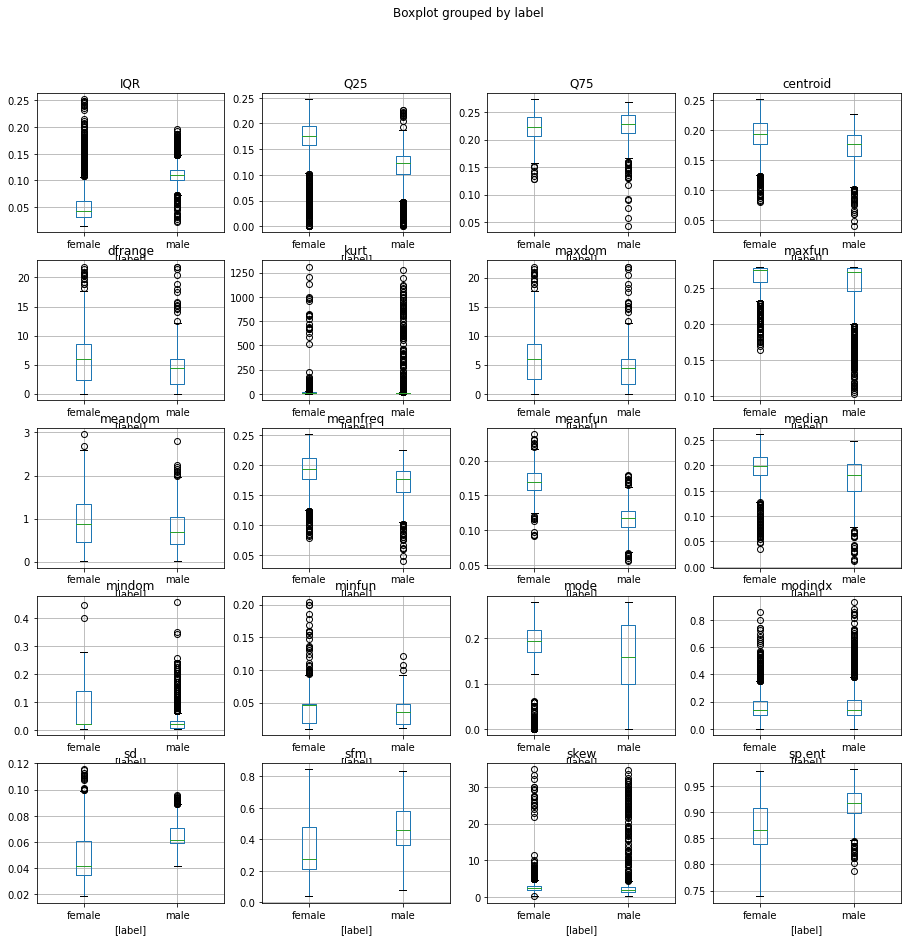

In [40]:
fig, axs = plt.subplots(5, 4, figsize=(15,15), sharey=False)
boxplot = voice_df.boxplot(by='label', ax=axs)

**Correlation matrix**

In [41]:
voice_df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [42]:
drop_cols = ['meanfreq', 'centroid', 'median', 'Q25', 'skew', 'kurt', 'maxdom', 'dfrange']
voice_df1 = voice_df.drop(labels=drop_cols, axis=1)

Multicollinearity exists prevalently ^^^^

**Separating Features & Y variable from the processed dataset**

In [43]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df1['label']
print(voice_X.columns)

Index(['sd', 'Q75', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'modindx'],
      dtype='object')


**Preprocessing**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector for implementation.

3) Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a bias column

In [44]:
# ordinal encoding
voice_y = np.array([voice_y.apply(lambda x: 1 if x=='male' else 0).to_numpy()]).T
voice_y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [45]:
# train val test split
voice_X_train, voice_X_40, voice_y_train, voice_y_40 = train_test_split(voice_X, voice_y,
                                                                random_state=23, train_size=0.6)
voice_X_val, voice_X_test, voice_y_val, voice_y_test = train_test_split(voice_X_40, voice_y_40,
                                                                random_state=23, train_size=0.6)

In [46]:
# standardize and add ones
for feature in list(voice_X_train.columns):
    # find column features
    train_mean = voice_X_train[feature].mean()
    train_std = voice_X_train[feature].std()
    # alter columns
    voice_X_train[feature] = voice_X_train[feature].apply(lambda x: (x - train_mean) / train_std)
    voice_X_val[feature] = voice_X_val[feature].apply(lambda x: (x - train_mean) / train_std)
    voice_X_test[feature] = voice_X_test[feature].apply(lambda x: (x - train_mean) / train_std)

voice_X_train['bias_feature'] = 1
voice_X_val['bias_feature'] = 1
voice_X_test['bias_feature'] = 1

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [47]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        self.w = np.zeros((len(X.columns), 1))
        loss_ls = list()
        for i in range(self.t):
            # append to loss list
            loss_ls.append(self.calculate_loss(X, y)[0][0])
            # find gradient
            grad = self.calculate_gradient(X, y)
            # alter w state
            self.w = self.w - (self.eta * grad)
        # update w attrib
        # return vector
        return np.array([loss_ls]).T
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        # case of w not trained
        if w is None:
            return "Must Train on Data"
        return np.round(self.calculate_sigmoid(X @ self.w))
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        first_term = y.T @ np.log(self.calculate_sigmoid(X @ self.w))
        second_term = ((np.ones((len(y), 1)) - y).T) @ np.log(np.ones((len(X @ self.w), 1)) - self.calculate_sigmoid(X @ self.w))
        third_term = self.alpha*(np.dot(self.w.T, self.w))
        return - first_term - second_term + third_term
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        sig_interior = X @ self.w
        interior = self.calculate_sigmoid(sig_interior) - y
        first_term = X.T @ interior
        total = first_term + (2 * self.alpha * self.w)
        return total
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return 1/(1+np.exp(-x))

In [48]:
w = np.zeros((6,1))
w.shape[1]
voice_X_train.shape[0]
voice_y_train.T.shape[1]

1900

**2.6 Plot Loss over Epoch and Search the space randomly to tune hyperparams.**

Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression.

Compare accuracy on the test dataset for both the scenarios.

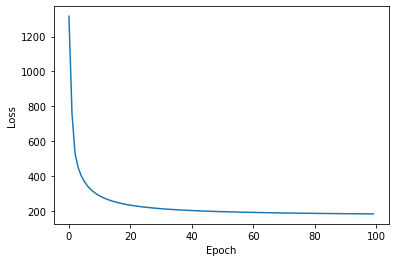

In [49]:
logreg = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = logreg.train(voice_X_train, voice_y_train)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [50]:
print("Training accuracy w/ alpha = 0,", accuracy_score(voice_y_train, logreg.predict(voice_X_train).to_numpy()))
print("Validation accuracy w/ alpha = 0,", accuracy_score(voice_y_val, logreg.predict(voice_X_val).to_numpy()))
print("Test accuracy w/ alpha = 0,", accuracy_score(voice_y_test, logreg.predict(voice_X_test).to_numpy()))

Training accuracy w/ alpha = 0, 0.9731578947368421
Validation accuracy w/ alpha = 0, 0.9671052631578947
Test accuracy w/ alpha = 0, 0.9744094488188977


In [52]:
# hyperparameter search
alphas = np.linspace(0, 1, num=10)
etas = np.linspace(0, 0.001, num=10)
ts = np.round(np.linspace(1, 100, num=10)).astype('int')
accuracies = list()
params = list()
for a in alphas:
    print(a)
    for eta in etas:
        for t in ts:
            logreg = LogisticRegression(alpha=a, t=t, eta=eta)
            losses = logreg.train(voice_X_train, voice_y_train)
            accuracies.append(accuracy_score(voice_y_val, logreg.predict(voice_X_val).to_numpy()))
            params.append([a, eta, t])

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


In [53]:
best_acc_at = np.array(accuracies).argmax()
print("Best Validation Accuracy:", accuracies[best_acc_at])
print("with params")
print("Alpha:", params[best_acc_at][0], "Eta:", params[best_acc_at][1], "t:", params[best_acc_at][2])

Best Validation Accuracy: 0.9671052631578947
with params
Alpha: 0.0 Eta: 0.0007777777777777778 t: 100


In [54]:
best_logreg = LogisticRegression(alpha=params[best_acc_at][0], eta=params[best_acc_at][1], t=params[best_acc_at][2])
best_logreg.train(voice_X_train, voice_y_train)
print("Test Accuracy", accuracy_score(voice_y_test, logreg.predict(voice_X_test).to_numpy()))

Test Accuracy 0.9744094488188977


**Feature Importance**

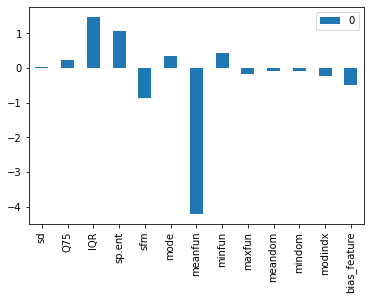

In [59]:
#code here
best_logreg.w.plot.bar()
plt.show()


**Part 3: Support Vector Machines**

**Dual SVM**

Train dual SVM for both kernel=“linear” and kernel=“rbf” on Voice Recognition data.


In [73]:
print("Linear")
linsvc = SVC(kernel='linear')
linsvc.fit(voice_X_train, voice_y_train)
pred_train = np.array(linsvc.predict(voice_X_train)).T
print("train acc:", accuracy_score(voice_y_train, pred_train))
val_train = np.array(linsvc.predict(voice_X_val)).T
print("val acc:", accuracy_score(voice_y_val, val_train))
test_train = np.array(linsvc.predict(voice_X_test)).T
print("test acc:", accuracy_score(voice_y_test, test_train))
print("Support vectors:", linsvc.support_vectors_)

Linear
train acc: 0.9763157894736842
val acc: 0.9671052631578947
test acc: 0.9763779527559056
Support vectors: [[ 2.47710916 -0.53205133  2.73287538 ... -0.70278302 -1.4491878
   1.        ]
 [ 1.22015735 -0.23766319  1.31814452 ...  0.03312008  0.56772565
   1.        ]
 [-0.72795944  1.33902382 -0.44230403 ... -0.70278302 -0.32057605
   1.        ]
 ...
 [-0.57273925  1.08638842 -1.10503558 ... -0.5801325  -0.47092439
   1.        ]
 [ 0.39044339 -1.97543485  0.11544998 ... -0.70278302 -0.64700631
   1.        ]
 [ 1.22651053 -2.19583432  0.71505748 ... -0.70278302 -1.01303976
   1.        ]]


D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
print("RBF")
svc = SVC(kernel='rbf')
svc.fit(voice_X_train, voice_y_train)
pred_train = np.array(svc.predict(voice_X_train)).T
print("train acc:", accuracy_score(voice_y_train, pred_train))
val_train = np.array(svc.predict(voice_X_val)).T
print("val acc:", accuracy_score(voice_y_val, val_train))
test_train = np.array(svc.predict(voice_X_test)).T
print("test acc:", accuracy_score(voice_y_test, test_train))
print("Support vectors:", svc.support_vectors_)

RBF
train acc: 0.9852631578947368
val acc: 0.9763157894736842
test acc: 0.9822834645669292
Support vectors: [[ 0.90148744 -0.30609057  0.97850216 ... -0.45748199 -0.80287814
   1.        ]
 [ 1.54189463 -1.59617616  1.82824472 ... -0.70278302 -0.13257293
   1.        ]
 [ 2.47710916 -0.53205133  2.73287538 ... -0.70278302 -1.4491878
   1.        ]
 ...
 [-0.7557001  -0.71181581 -0.50673167 ... -0.70278302  0.69696429
   1.        ]
 [ 1.21133785 -0.49564899  0.48563998 ...  1.62757678  0.37312107
   1.        ]
 [ 1.22651053 -2.19583432  0.71505748 ... -0.70278302 -1.01303976
   1.        ]]


D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RBF has a better accuracy. RBF is marginally better because we dont have a super large amount of training data. Support vectors are of expected shape

**Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation.**

In [81]:
from sklearn.model_selection import cross_val_score

voice_X_val, voice_X_test, voice_y_val, voice_y_test = train_test_split(voice_X, voice_y,
                                                                random_state=23, train_size=0.8)
c_vals = np.round(np.linspace(1, 100, num=10))
model_scores = list()
for c_val in c_vals:
    svc = SVC(kernel='rbf', C=c_val)
    scores = cross_val_score(svc, voice_X_val, voice_y_val, cv=5)
    model_scores.append(np.mean(scores))

D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [85]:
best_cval = np.array(model_scores).argmax()
print("Best Score:", model_scores[best_cval])
print("With C value:", c_vals[best_cval])
svc = SVC(kernel='rbf', C=c_vals[best_cval])
svc.fit(voice_X_val, voice_y_val)
preds = svc.predict(voice_X_test)
print("With accuracy:", accuracy_score(voice_y_test, preds))

Best Score: 0.977903033421428
With C value: 100.0
With accuracy: 0.9779179810725552


D:\langs\anaconda_dist\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
